<a href="https://colab.research.google.com/github/ashiqu-ali/cataract-detection-using-cnn/blob/main/cataract_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d ashiquali/cataract-detection

 98% 493M/503M [00:04<00:00, 162MB/s]
100% 503M/503M [00:04<00:00, 128MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cataract-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [5]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cataract_detection/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cataract_detection/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 491 files belonging to 2 classes.
Found 121 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
#create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
16/16 [==============================] - 16s 642ms/step - loss: 0.0758 - accuracy: 0.9756 - val_loss: 17.8807 - val_accuracy: 0.4959
Epoch 2/10
16/16 [==============================] - 16s 723ms/step - loss: 0.0429 - accuracy: 0.9837 - val_loss: 15.2224 - val_accuracy: 0.4959
Epoch 3/10
16/16 [==============================] - 15s 644ms/step - loss: 0.1347 - accuracy: 0.9857 - val_loss: 6.7088 - val_accuracy: 0.5207
Epoch 4/10
16/16 [==============================] - 16s 650ms/step - loss: 0.0692 - accuracy: 0.9776 - val_loss: 19.2547 - val_accuracy: 0.4959
Epoch 5/10
16/16 [==============================] - 13s 553ms/step - loss: 0.2150 - accuracy: 0.9735 - val_loss: 4.4327 - val_accuracy: 0.6446
Epoch 6/10
16/16 [==============================] - 15s 640ms/step - loss: 0.1156 - accuracy: 0.9878 - val_loss: 4.9837 - val_accuracy: 0.6281
Epoch 7/10
16/16 [==============================] - 16s 674ms/step - loss: 0.1114 - accuracy: 0.9857 - val_loss: 2.5864 - val_accuracy: 0.7

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.show()


In [16]:
import cv2

In [46]:
test_img = cv2.imread('/content/cataract_detection/test/cataract/image_256.png')
test_img = cv2.resize(test_img, (256,256))
test_input = test_img.reshape(1,256,256,3)

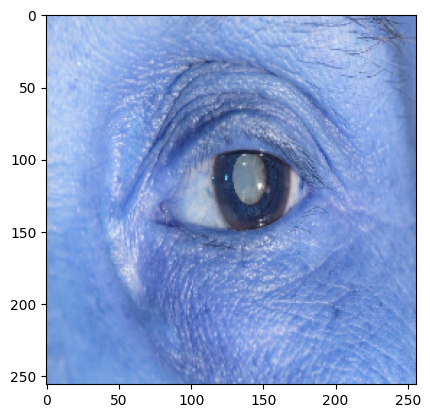

In [47]:
plt.imshow(test_img)

In [48]:
# Assuming model.predict(test_input) returns a NumPy array
prediction = model.predict(test_input)

if prediction[0, 0] > 0.5:
    print("Normal")
else:
    print("Cataract")


1/1 [==============================] - 0s 18ms/step
Cataract
